# Question 2: Materials Project API Exploration

**2.1 Querying Materials Project Database**

You will use the Materials Project API (MPRester and pymatgen) to query materials based on various criteria. You may choose to use the legacy or the new API.

a) Initialize MPRester and query materials to find stable (within 50meV of convex hull) binary oxides with density greater than 4 g/cc. For these materials extract materials properties from materials project. 

In [9]:
import pandas as pd
from mp_api.client import MPRester
#from pymatgen.ext.matproj import MPRester
import os

filename = r'C:\Users\Aidan Belanger\OneDrive\Desktop\Materials Informatics\MyMatProjApiKey.txt'

def get_file_contents(filename):
    try:
        with open(filename, 'r') as f:
            # It's assumed our file contains a single line,
            # with our API key
            return f.read().strip()
    except FileNotFoundError:
        print("'%s' file not found" % filename)

Aidans_API = get_file_contents(filename)


# -- New MP API --
with MPRester(Aidans_API) as mpr:
    list_fields = mpr.summary.available_fields

print(list_fields)



['builder_meta', 'nsites', 'elements', 'nelements', 'composition', 'composition_reduced', 'formula_pretty', 'formula_anonymous', 'chemsys', 'volume', 'density', 'density_atomic', 'symmetry', 'property_name', 'material_id', 'deprecated', 'deprecation_reasons', 'last_updated', 'origins', 'warnings', 'structure', 'task_ids', 'uncorrected_energy_per_atom', 'energy_per_atom', 'formation_energy_per_atom', 'energy_above_hull', 'is_stable', 'equilibrium_reaction_energy_per_atom', 'decomposes_to', 'xas', 'grain_boundaries', 'band_gap', 'cbm', 'vbm', 'efermi', 'is_gap_direct', 'is_metal', 'es_source_calc_id', 'bandstructure', 'dos', 'dos_energy_up', 'dos_energy_down', 'is_magnetic', 'ordering', 'total_magnetization', 'total_magnetization_normalized_vol', 'total_magnetization_normalized_formula_units', 'num_magnetic_sites', 'num_unique_magnetic_sites', 'types_of_magnetic_species', 'bulk_modulus', 'shear_modulus', 'universal_anisotropy', 'homogeneous_poisson', 'e_total', 'e_ionic', 'e_electronic',

C:\Users\Aidan Belanger\AppData\Local\Temp\ipykernel_13420\1495654673.py:22: DeprecationWarning: Accessing summary data through MPRester.summary is deprecated. Please use MPRester.materials.summary instead.
  list_fields = mpr.summary.available_fields


In [10]:
## -- New MP API --
materials = mpr.summary._search(elements=["O"],nelements_min=2,nelements_max=2,density_min=4, energy_above_hull_max=50)
print(materials[0].formula_pretty)


C:\Users\Aidan Belanger\AppData\Local\Temp\ipykernel_13420\1934092737.py:2: DeprecationWarning: Accessing summary data through MPRester.summary is deprecated. Please use MPRester.materials.summary instead.
  materials = mpr.summary._search(elements=["O"],nelements_min=2,nelements_max=2,density_min=4, energy_above_hull_max=50)
Retrieving SummaryDoc documents: 100%|██████████| 1362/1362 [00:08<00:00, 161.10it/s]

Ti6O


b) Display basic information about the queried materials.



In [11]:
# Display the extracted materials properties
for i in range(1362):
    print(materials[i].formula_pretty)


Ti6O
Tl2O
SnO
Ti6O
TiO
ZnO
Ag2O
PtO
CuO
PdO
PbO
CeO
VO
FeO
TiO
Pb3O
HgO
NiO
FeO
VO
BaO
Ag3O
TlO
MnO
NiO
FeO
Tl2O
NbO
AgO
V8O
SmO
Ti3O
ZnO
BaO
HoO
HgO
SnO
Cu8O
CrO
CoO
BrO
NdO
Cs2O
TaO
BaO
SrO
CrO
Ti3O
FeO
Zr3O
BaO
LaO
BaO
MnO
CoO
ZnO
Ta4O
Zr3O
TiO
Pb2O
FeO
Os3O
Pa3O
GaO
SrO
CrO
Ge3O
HgO
TiO
ZrO
GdO
CuO
FeO
TeO
Zr4O
CuO
CuO
AgO
AgO
AgO
CoO
PbO
TiO
ZnO
AgO
EuO
Cu2O
Fe3O
Ag2O
PtO
VO
CdO
FeO
SrO
Os3O
CuO
BaO
TlO
ZrO
NbO
ZnO
MnO
InO
TiO
Pt2O
Sm2O
SnO
AcO
Ti3O
Ti3O
Mo2O
HgO
Ti3O
BaO
Ni4O
CrO
PaO
CuO
TiO
HgO
Br2O
FeO
CoO
FeO
ZnO
FeO
CoO
MnO
ZnO
PbO
Rb2O
TiO
CrO
CoO
CuO
NdO
Ta2O
Zr2O
SnO
ZnO
Sm2O
AgO
Ti2O
Pb3O
BaO
NbO
TiO
SnO
Au3O
BaO
Zr2O
SnO
Ti2O
CrO
Zr3O
Cr2O
Ti2O
Pd2O
ScO
CrO
TiO
VO
PbO
TiO
FeO
SnO
CrO
CuO
MnO
CdO
TiO
ErO
Ag2O
PdO
FeO
ZnO
UO
SnO
CoO
W3O
Ti2O
AgO
PbO
Cu64O
ThO
PrO
ZnO
BaO
SrO
Rb2O
SnO
Cs2O
CrO
ZnO
PdO
TiO
ZnO
Ti2O
Cr3O
Ti2O
Ag2O
BiO
FeO
BrO
CoO
SnO
Th3O
NpO
Cs2O
BaO
FeO
PuO
YO
Cu8O
Ti3O
Cr3O
FeO
Sn2O
Ta6O
Ti2O
CrO
FeO2
ZrO2
MnO2
ZrO2
MoO2
MnO2
GdO2
HfO2
BaO2
NbO2
ZrO2
TlO2


In [12]:
print(materials[0].formula_pretty)
print(materials[0].density)
print(materials[0].energy_above_hull)

Ti6O
4.718230249800664
0.0


**2.2 Matching Structures to CIF Cards**

a) Using the Crystallographic Open Database (http://crystallography.net/cod/search.html) or the American Mineralogist Crystal Structure Database (https://rruff.geo.arizona.edu/AMS/amcsd.php) look up the cif card for your birth month (https://en.wikipedia.org/wiki/Birthstone). 

Then, see if you can use that cif card to find any Materials Project matches. Save the mp-id's to a list

In [13]:
from pymatgen.io.cif import CifParser

# September birthstone is Sapphire (Al2O3)
fpath = r"C:\Al2O3.cif"

with MPRester(Aidans_API) as mpr:
    # open cif file with cif parser
    parser = CifParser(fpath)
    # get structural composition from the cif file
    structure = parser.parse_structures(primitive=True)[0]
    # get the compositional formula from the parsed information and remove white space
    formula = str(structure.composition.formula).replace(" ","")
    # search materials project for cif files with the compositional formula
    docs = mpr.materials.summary._search(formula=formula,fields=["material_id"])
   

material_ids = []
for doc in docs:
    material_ids.append(doc.material_id)
pd.DataFrame(material_ids)


Retrieving SummaryDoc documents: 100%|██████████| 89/89 [00:00<00:00, 87999.31it/s]


,0
0,mp-985587
1,mp-1245104
2,mp-1245262
3,mp-1244874
4,mp-1247896
...,...
84,mp-754531
85,mp-2352722
86,mp-1245183
87,mp-1245008


**2.3 Plotting Materials Properties**

Plot relevant properties extracted from the Materials Project database.

a) Extract and plot materials properties (e.g., density, formation energy) for the queried materials.

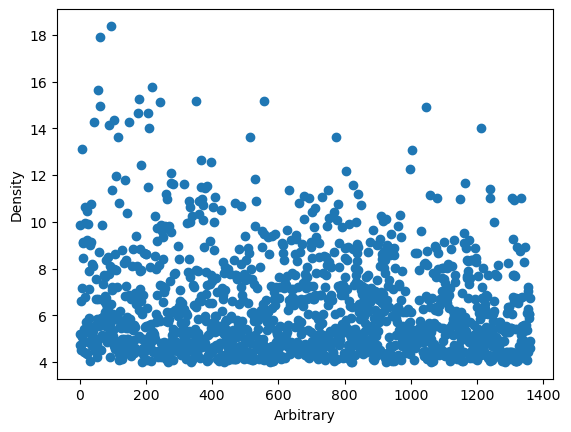

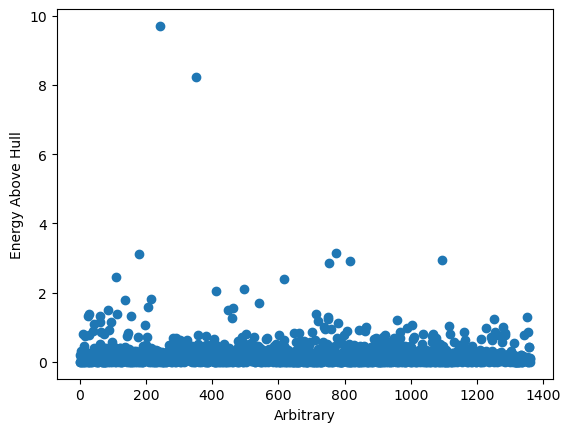

In [14]:
import matplotlib.pyplot as plt

Densities=[]
for i in range(1362):
    Densities.append(materials[i].density)
plt.scatter(range(1362),Densities)
plt.ylabel("Density")
plt.xlabel("Arbitrary")
plt.show()

Form_energies=[]
for i in range(1362):
    Form_energies.append(materials[i].energy_above_hull)
plt.scatter(range(1362),Form_energies)
plt.ylabel("Energy Above Hull")
plt.xlabel("Arbitrary")
plt.show()